In [2]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
import pandas as pd
import joblib

from evaluation.model_evaluator import ModelEvaluator

In [3]:
# Load model and data
model = joblib.load('../models/logistic_credit.pkl')  # or random_forest_model.pkl
_, _, X_test, y_test, _ = joblib.load('../data/creditcard_preprocessed.pkl')


In [4]:
# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For PR curve


🧪 Evaluation Report for Logistic Regression
----------------------------------------
F1 Score: 0.10935601458080195

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



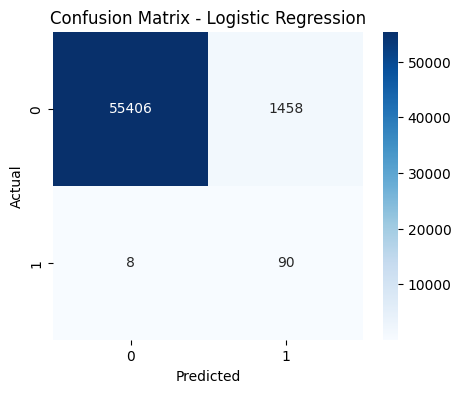

Precision-Recall AUC: 0.7703412904668423


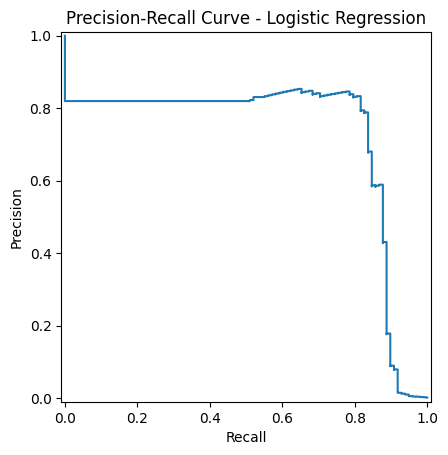

/home/liya/Desktop/KAIM/fraud-detection-for-eCommerce-w8/.venv/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


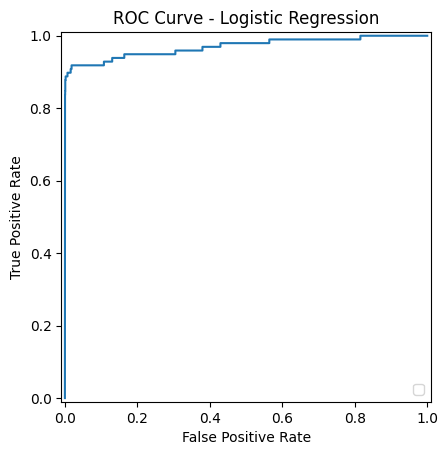

In [5]:
# Evaluate
evaluator = ModelEvaluator(model_name="Logistic Regression")
evaluator.evaluate(y_test, y_pred, y_proba)

In [6]:
# Load test data
_, _, X_test, y_test, _ = joblib.load('../data/creditcard_preprocessed.pkl')

In [7]:
# Load Random Forest model
rf_model = joblib.load('../models/rf_credit.pkl')

In [8]:
# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # probability for class 1


🧪 Evaluation Report for Random Forest
----------------------------------------
F1 Score: 0.8367346938775511

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



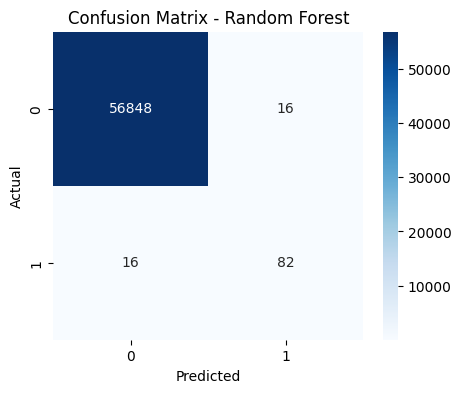

Precision-Recall AUC: 0.8711100501368605


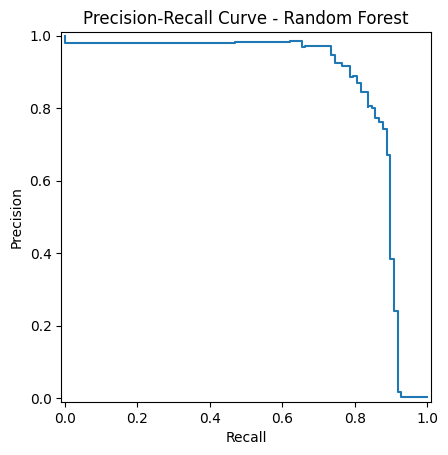

/home/liya/Desktop/KAIM/fraud-detection-for-eCommerce-w8/.venv/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


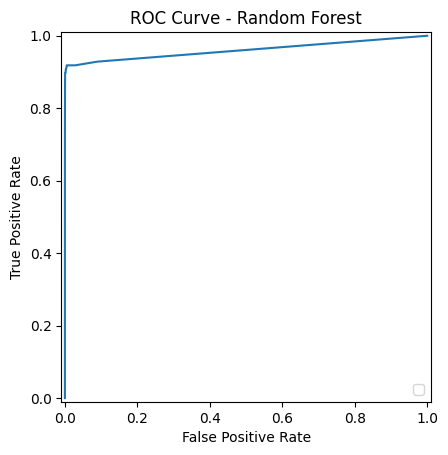

In [9]:
# Evaluate
rf_evaluator = ModelEvaluator(model_name="Random Forest")
rf_evaluator.evaluate(y_test, y_pred_rf, y_proba_rf)